Chapter 32
# 高斯朴素贝叶斯
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [2]:
# 导入并整理数据
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
# 生成网格化数据
x1_array = np.linspace(4,8,101)
x2_array = np.linspace(1,5,101)
xx1, xx2 = np.meshgrid(x1_array,x2_array)

In [4]:
# 创建色谱
rgb = [[255, 238, 255],  
       [219, 238, 244],  
       [228, 228, 228]]  
rgb = np.array(rgb)/255.
cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0], 
             [0, 153, 255],
             [138,138,138]]
cmap_bold = np.array(cmap_bold)/255.

In [5]:
from sklearn.naive_bayes import GaussianNB
# 创建高斯朴素贝叶斯分类器对象
gnb = GaussianNB()
gnb.fit(X, y)
# 用高斯朴素贝叶斯分类器对一系列查询点进行预测
q = np.c_[xx1.ravel(), xx2.ravel()]
y_predict = gnb.predict(q)
y_predict = y_predict.reshape(xx1.shape)

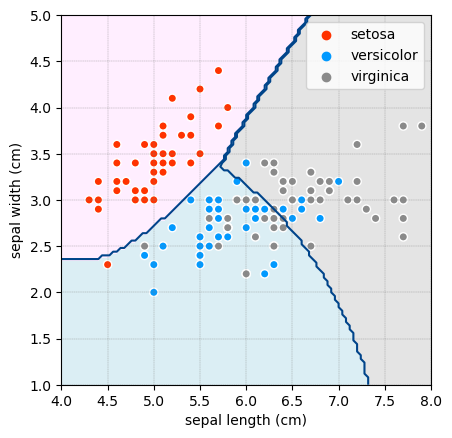

In [6]:
# 可视化
fig, ax = plt.subplots()
plt.contourf(xx1, xx2, y_predict, cmap=cmap_light)
plt.contour(xx1, xx2, y_predict, levels=[0,1,2], 
            colors=np.array([0, 68, 138])/255.)
sns.scatterplot(x=X[:, 0], y=X[:, 1], 
                hue=iris.target_names[y],
                ax = ax,
                palette=dict(setosa=cmap_bold[0,:],
                versicolor=cmap_bold[1,:], 
                virginica=cmap_bold[2,:]),
                alpha=1.0, 
                linewidth = 1, edgecolor=[1,1,1])
plt.xlim(4, 8); plt.ylim(1, 5)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25, 
        color=[0.5,0.5,0.5])
ax.set_aspect('equal', adjustable='box')